# Mobile Customer Churn

In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn.  Churn is where
a customer leaves the mobile provider.   The goal is to build a simple predictive model to predict churn from available features. 

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus.  The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv` (store these in the `files` folder in your project).

Your high level goal in this notebook is to try to build and evaluate a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

__Note:__ you are not being evaluated on the _accuracy_ of the model but on the _process_ that you use to generate it.  You can use a simple model such as Logistic Regression for this task or try one of the more advanced methods covered in recent weeks.  Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
churn_df = pd.read_csv("MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')

# Preparing Data

In [4]:
churn =churn_df.drop(columns = ['CUST_ID','RECON_SMS_NEXT_MTH','RECON_TELE_NEXT_MTH','RECON_EMAIL_NEXT_MTH'])

In [5]:
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
INDEX,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW


Ways to handle string data for Predictive Model
1. Label Encoding - Assigns number in form of order
2. Label Binarizer.
3. OneHot Encoding - Order free conversion for labels to integer. One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables.The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [7]:
churn.BYO_PLAN_STATUS.unique()

array(['NON BYO', 'BYO'], dtype=object)

Label Encoding should be done here as the two classifications are relative

In [8]:
churn['BYO_PLAN_STATUS']= label_encoder.fit_transform(churn['BYO_PLAN_STATUS']) 

In [9]:
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
INDEX,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,1,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
2,60,3,55.0,CONSUMER,59,54.54,1,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
3,65,1,29.0,CONSUMER,65,40.90,0,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
4,31,1,51.0,CONSUMER,31,31.81,1,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
5,95,1,31.0,CONSUMER,95,54.54,1,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW


In [10]:
churn.CONTRACT_STATUS.unique()

array(['OFF-CONTRACT', 'ON-CONTRACT', 'NO-CONTRACT'], dtype=object)

Label Encoding 0, 1, 2 is good as can be used as these classifications of contract are relative

In [11]:
churn['CONTRACT_STATUS']= label_encoder.fit_transform(churn['CONTRACT_STATUS']) 

In [12]:
churn.HANDSET_USED_BRAND.unique()

array(['SAMSUNG', 'APPLE', 'UNKNOWN', 'OTHER', 'GOOGLE', 'HUAWEI'],
      dtype=object)

Lets use one hot encoding for Brand, as there is no order / rank metric possible between these brands

In [13]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(churn.HANDSET_USED_BRAND.values.reshape(-1,1)).toarray()

In [14]:
dfOneHot = pd.DataFrame(X, columns = ["BRAND_"+str(int(i)) for i in range(len(churn.HANDSET_USED_BRAND.unique()))])

In [15]:
dfOneHot 

,BRAND_0,BRAND_1,BRAND_2,BRAND_3,BRAND_4,BRAND_5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
46201,0.0,0.0,0.0,1.0,0.0,0.0
46202,0.0,0.0,0.0,0.0,0.0,1.0
46203,1.0,0.0,0.0,0.0,0.0,0.0
46204,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
churn_brand = pd.concat([churn, dfOneHot], axis=1)

In [17]:
churn.COUNTRY_METRO_REGION.unique()

array(['COUNTRY', 'METRO', nan], dtype=object)

Label Encoding 0 and 1 is good as METRO region use more mobiles than Country

In [18]:
churn[churn.COUNTRY_METRO_REGION.isnull() == True]
    

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
INDEX,,,,,,,,,,,,,,,,,
23119,94,1,52.0,CONSUMER,194,72.72,1,3,21,24,2,24,APPLE,0,72.72,NaN,NaN


In [19]:
churn_brand.dropna(inplace = True)
    

In [20]:
churn_brand.COUNTRY_METRO_REGION.unique()

array(['COUNTRY', 'METRO'], dtype=object)

In [21]:
churn_brand['COUNTRY_METRO_REGION']= label_encoder.fit_transform(churn_brand['COUNTRY_METRO_REGION']) 

In [22]:
churn.CFU.unique()

array(['CONSUMER', 'SMALL BUSINESS'], dtype=object)

In [23]:
churn_brand['CFU']= label_encoder.fit_transform(churn_brand['CFU']) 

In [24]:
churn_brand.CHURN_IND.value_counts()

0.0    28365
1.0    17763
Name: CHURN_IND, dtype: int64

Data is biased towards 0. We can manage this by Bagging or Boosting methods of predictive Classificaiton

Given the size of data is huge, lets drop STATE Feature and assume that Mobile Churn is a general phenomenon

In [25]:
churn_brand.drop(columns = ['STATE'],inplace= True)

In [35]:
churn_brand.drop(columns = ['HANDSET_USED_BRAND'],inplace= True)

# Visvualsing Data

In [26]:
import seaborn as sns

In [27]:
churn_brand.columns

Index(['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE', 'CFU', 'SERVICE_TENURE',
       'PLAN_ACCESS_FEE', 'BYO_PLAN_STATUS', 'PLAN_TENURE',
       'MONTHS_OF_CONTRACT_REMAINING', 'LAST_FX_CONTRACT_DURATION',
       'CONTRACT_STATUS', 'PREV_CONTRACT_DURATION', 'HANDSET_USED_BRAND',
       'CHURN_IND', 'MONTHLY_SPEND', 'COUNTRY_METRO_REGION', 'BRAND_0',
       'BRAND_1', 'BRAND_2', 'BRAND_3', 'BRAND_4', 'BRAND_5'],
      dtype='object')

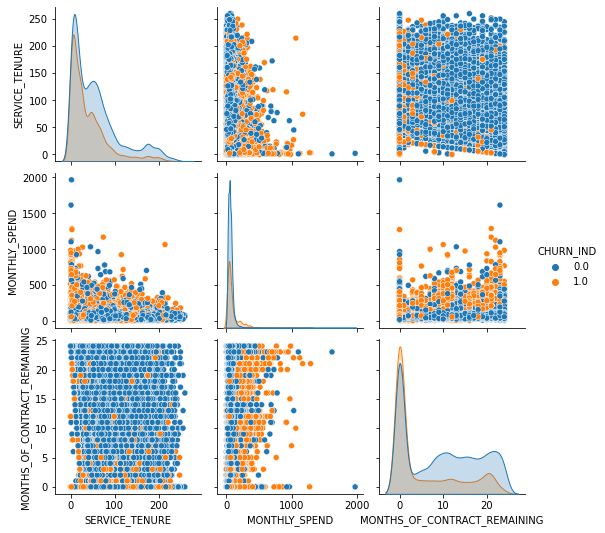

In [141]:
sns.pairplot(churn_brand[['SERVICE_TENURE','MONTHLY_SPEND','MONTHS_OF_CONTRACT_REMAINING',
       'CHURN_IND']], hue = 'CHURN_IND' )

# Scaling Data by Normalization

This brings the values in the range of 0 to 1. It does not impact data which are already in that range

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
min_max_scaler = MinMaxScaler()

In [37]:
churn_brand

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,...,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,BRAND_0,BRAND_1,BRAND_2,BRAND_3,BRAND_4,BRAND_5
1,46.0,1.0,30.0,0,46.0,54.54,1.0,15.0,0.0,24.0,...,24.0,1.0,61.40,0,1.0,0.0,0.0,0.0,0.0,0.0
2,60.0,3.0,55.0,0,59.0,54.54,1.0,5.0,0.0,24.0,...,24.0,1.0,54.54,1,1.0,0.0,0.0,0.0,0.0,0.0
3,65.0,1.0,29.0,0,65.0,40.90,0.0,15.0,0.0,12.0,...,12.0,1.0,2.50,0,1.0,0.0,0.0,0.0,0.0,0.0
4,31.0,1.0,51.0,0,31.0,31.81,1.0,31.0,0.0,24.0,...,24.0,1.0,6.48,0,1.0,0.0,0.0,0.0,0.0,0.0
5,95.0,1.0,31.0,0,95.0,54.54,1.0,0.0,0.0,24.0,...,24.0,1.0,100.22,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46201,46.0,4.0,51.0,0,46.0,8.18,1.0,5.0,0.0,12.0,...,12.0,0.0,8.18,0,0.0,0.0,0.0,1.0,0.0,0.0
46202,10.0,1.0,61.0,0,9.0,27.27,0.0,7.0,0.0,0.0,...,0.0,0.0,27.27,0,0.0,0.0,0.0,0.0,0.0,1.0
46203,2.0,1.0,53.0,0,2.0,54.54,1.0,2.0,0.0,24.0,...,24.0,1.0,54.99,1,1.0,0.0,0.0,0.0,0.0,0.0
46204,47.0,1.0,22.0,0,47.0,72.72,1.0,7.0,17.0,24.0,...,24.0,0.0,72.72,0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
churn_brand_scaled= pd.DataFrame(min_max_scaler.fit_transform(churn_brand),columns = churn_brand.columns )

In [39]:
churn_brand_scaled

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,...,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,BRAND_0,BRAND_1,BRAND_2,BRAND_3,BRAND_4,BRAND_5
0,0.383333,0.000000,0.283333,0.0,0.177606,0.204807,1.0,0.102041,0.000000,0.666667,...,0.666667,1.0,0.030730,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.500000,0.666667,0.491667,0.0,0.227799,0.204807,1.0,0.034014,0.000000,0.666667,...,0.666667,1.0,0.027238,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.541667,0.000000,0.275000,0.0,0.250965,0.144549,0.0,0.102041,0.000000,0.333333,...,0.333333,1.0,0.000753,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.258333,0.000000,0.458333,0.0,0.119691,0.104391,1.0,0.210884,0.000000,0.666667,...,0.666667,1.0,0.002779,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.791667,0.000000,0.291667,0.0,0.366795,0.204807,1.0,0.000000,0.000000,0.666667,...,0.666667,1.0,0.050487,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46123,0.383333,1.000000,0.458333,0.0,0.177606,0.000000,1.0,0.034014,0.000000,0.333333,...,0.333333,0.0,0.003644,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46124,0.083333,0.000000,0.541667,0.0,0.034749,0.084335,0.0,0.047619,0.000000,0.000000,...,0.000000,0.0,0.013360,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46125,0.016667,0.000000,0.475000,0.0,0.007722,0.204807,1.0,0.013605,0.000000,0.666667,...,0.666667,1.0,0.027467,1.0,1.0,0.0,0.0,0.0,0.0,0.0
46126,0.391667,0.000000,0.216667,0.0,0.181467,0.285121,1.0,0.047619,0.708333,0.666667,...,0.666667,0.0,0.036491,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Removing Outliers

In [40]:
churn_brand_scaled.std()/churn_brand_scaled.mean()

ACCOUNT_TENURE                  0.720729
ACCT_CNT_SERVICES               1.504936
AGE                             0.336117
CFU                             2.354182
SERVICE_TENURE                  1.031319
PLAN_ACCESS_FEE                 0.482963
BYO_PLAN_STATUS                 0.550105
PLAN_TENURE                     0.900541
MONTHS_OF_CONTRACT_REMAINING    1.012742
LAST_FX_CONTRACT_DURATION       0.394707
CONTRACT_STATUS                 0.466839
PREV_CONTRACT_DURATION          0.719941
CHURN_IND                       1.263682
MONTHLY_SPEND                   0.989818
COUNTRY_METRO_REGION            0.672473
BRAND_0                         0.928748
BRAND_1                         4.148637
BRAND_2                         5.805991
BRAND_3                         4.976984
BRAND_4                         1.561599
BRAND_5                         4.370327
dtype: float64

We will not consider the features which have converted into labels or one hot encoding. But in rest of them we can remove outleirs 

In [42]:
from scipy import stats

In [45]:
churn_brand_scaled.columns

Index(['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE', 'CFU', 'SERVICE_TENURE',
       'PLAN_ACCESS_FEE', 'BYO_PLAN_STATUS', 'PLAN_TENURE',
       'MONTHS_OF_CONTRACT_REMAINING', 'LAST_FX_CONTRACT_DURATION',
       'CONTRACT_STATUS', 'PREV_CONTRACT_DURATION', 'CHURN_IND',
       'MONTHLY_SPEND', 'COUNTRY_METRO_REGION', 'BRAND_0', 'BRAND_1',
       'BRAND_2', 'BRAND_3', 'BRAND_4', 'BRAND_5'],
      dtype='object')

In [51]:
churn_zscore = churn_brand_scaled[['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE',  'SERVICE_TENURE',
       'PLAN_ACCESS_FEE',  'PLAN_TENURE',
       'MONTHS_OF_CONTRACT_REMAINING', 'LAST_FX_CONTRACT_DURATION',
        'PREV_CONTRACT_DURATION', 
       'MONTHLY_SPEND',]]

In [54]:
churn_zscore

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,MONTHLY_SPEND
0,0.383333,0.000000,0.283333,0.177606,0.204807,0.102041,0.000000,0.666667,0.666667,0.030730
1,0.500000,0.666667,0.491667,0.227799,0.204807,0.034014,0.000000,0.666667,0.666667,0.027238
2,0.541667,0.000000,0.275000,0.250965,0.144549,0.102041,0.000000,0.333333,0.333333,0.000753
3,0.258333,0.000000,0.458333,0.119691,0.104391,0.210884,0.000000,0.666667,0.666667,0.002779
4,0.791667,0.000000,0.291667,0.366795,0.204807,0.000000,0.000000,0.666667,0.666667,0.050487
...,...,...,...,...,...,...,...,...,...,...
46123,0.383333,1.000000,0.458333,0.177606,0.000000,0.034014,0.000000,0.333333,0.333333,0.003644
46124,0.083333,0.000000,0.541667,0.034749,0.084335,0.047619,0.000000,0.000000,0.000000,0.013360
46125,0.016667,0.000000,0.475000,0.007722,0.204807,0.013605,0.000000,0.666667,0.666667,0.027467
46126,0.391667,0.000000,0.216667,0.181467,0.285121,0.047619,0.708333,0.666667,0.666667,0.036491


In [60]:
z_scores = stats.zscore(churn_zscore)
# calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
churn_clean = churn_brand_scaled[filtered_entries]

In [61]:
filtered_entries

array([ True,  True,  True, ...,  True,  True,  True])

In [69]:
print((len(churn_brand_scaled) - len(churn_clean))/len(churn_brand_scaled)*100)

7.086801942421089


We droped about 7% entries as outliers

# Feature Selection

In [70]:
hm =  churn_clean[['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE',  'SERVICE_TENURE',
       'PLAN_ACCESS_FEE',  'PLAN_TENURE',
       'MONTHS_OF_CONTRACT_REMAINING', 'LAST_FX_CONTRACT_DURATION',
        'PREV_CONTRACT_DURATION', 
       'MONTHLY_SPEND','CHURN_IND']]

<AxesSubplot:>

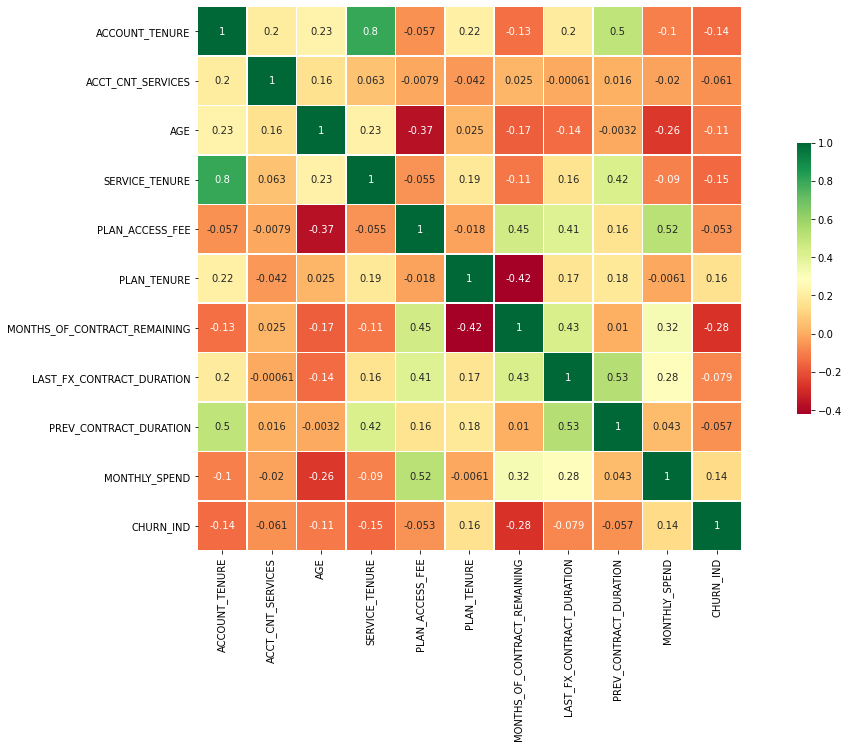

In [71]:
f, ax = plt.subplots(figsize=(20, 10))
# cmap = sns.diverging_palette(20, 200, as_cmap=True)
sns.heatmap(hm.corr(), annot=True, cmap ='RdYlGn',
square=True, linewidths=.5, cbar_kws={"shrink": .5})


We can see high correlation between - 
1. SERVICE_TENURE and ACCOUNT_Tenure
1. Account Tenure and Previous Contract Duration
2. Previous Contract Duration and LAST_FX_CONTRACT_DURATION
3. PLAN_ACCESS_FEE and MONTHLY_SPEND

# ANOVA Analysis to get F-Score and eliminate some features

In [72]:
hm.columns

Index(['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE', 'SERVICE_TENURE',
       'PLAN_ACCESS_FEE', 'PLAN_TENURE', 'MONTHS_OF_CONTRACT_REMAINING',
       'LAST_FX_CONTRACT_DURATION', 'PREV_CONTRACT_DURATION', 'MONTHLY_SPEND',
       'CHURN_IND'],
      dtype='object')

In [87]:
X = churn_clean[['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE', 'SERVICE_TENURE',
       'PLAN_ACCESS_FEE', 'PLAN_TENURE', 'MONTHS_OF_CONTRACT_REMAINING',
       'LAST_FX_CONTRACT_DURATION', 'PREV_CONTRACT_DURATION', 'MONTHLY_SPEND']]
y= churn_clean['CHURN_IND']

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [88]:
fs = SelectKBest(score_func=f_classif, k=4)
# apply feature selection
#X_selected = fs.fit_transform(X, y)
#print(X_selected.shape)
fit = fs.fit(X, y)
#print(fit.scores_)
#print(fit.pvalues_)

for n,s,p in zip(X.columns,fit.scores_,fit.pvalues_):
    print("F-score and P-values respectively : ", "{:.2f}".format(s),"and", "{:.7f}".format(p), " for feature ", n)

F-score and P-values respectively :  870.66 and 0.0000000  for feature  ACCOUNT_TENURE
F-score and P-values respectively :  160.09 and 0.0000000  for feature  ACCT_CNT_SERVICES
F-score and P-values respectively :  538.05 and 0.0000000  for feature  AGE
F-score and P-values respectively :  923.40 and 0.0000000  for feature  SERVICE_TENURE
F-score and P-values respectively :  121.41 and 0.0000000  for feature  PLAN_ACCESS_FEE
F-score and P-values respectively :  1076.91 and 0.0000000  for feature  PLAN_TENURE
F-score and P-values respectively :  3595.28 and 0.0000000  for feature  MONTHS_OF_CONTRACT_REMAINING
F-score and P-values respectively :  266.88 and 0.0000000  for feature  LAST_FX_CONTRACT_DURATION
F-score and P-values respectively :  140.20 and 0.0000000  for feature  PREV_CONTRACT_DURATION
F-score and P-values respectively :  805.00 and 0.0000000  for feature  MONTHLY_SPEND


P value is very low and hence we can reject the null hypothesis
We can drop PLAN_ACCESS_FEE, PREV_CONTRACT_DURATION, ACCT_CNT_SERVICES and LAST_FX_CONTRACT_DURATION  due to Low F values

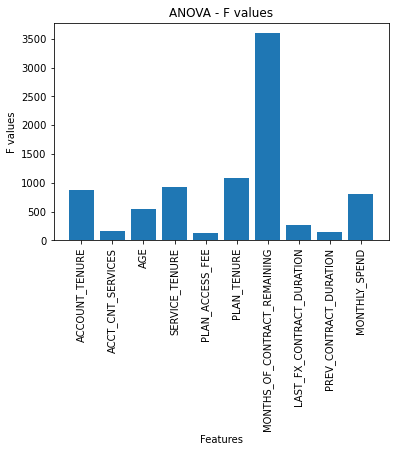

In [79]:
plt.title('ANOVA - F values')
plt.xlabel('Features')
plt.ylabel('F values')
plt.bar(X.columns, fit.scores_)
plt.xticks(range(len(X.columns)), X.columns, rotation='vertical')
plt.show()

# SVM Model

In [115]:
from sklearn.svm import SVC 
from sklearn.metrics import *

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [81]:
churn_clean.columns

Index(['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE', 'CFU', 'SERVICE_TENURE',
       'PLAN_ACCESS_FEE', 'BYO_PLAN_STATUS', 'PLAN_TENURE',
       'MONTHS_OF_CONTRACT_REMAINING', 'LAST_FX_CONTRACT_DURATION',
       'CONTRACT_STATUS', 'PREV_CONTRACT_DURATION', 'CHURN_IND',
       'MONTHLY_SPEND', 'COUNTRY_METRO_REGION', 'BRAND_0', 'BRAND_1',
       'BRAND_2', 'BRAND_3', 'BRAND_4', 'BRAND_5'],
      dtype='object')

In [101]:
X =churn_clean[['ACCOUNT_TENURE',  'AGE', 'CFU', 'SERVICE_TENURE',
        'BYO_PLAN_STATUS', 'PLAN_TENURE',
       'MONTHS_OF_CONTRACT_REMAINING', 
       'CONTRACT_STATUS',  'CHURN_IND',
       'MONTHLY_SPEND', 'COUNTRY_METRO_REGION', 'BRAND_0', 'BRAND_1',
       'BRAND_2', 'BRAND_3', 'BRAND_4', 'BRAND_5']]
y= churn_clean['CHURN_IND']

In [142]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42)

In [134]:
svm = SVC(kernel ='rbf')
svm.fit(X_train, y_train)

SVC()

In [135]:
y_pred = svm.predict(X_test)

In [143]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, xticklabels = ['Churn = 0','Churn = 1'], yticklabels = ['Churn = 0','Churn = 1'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Connfusion Matrix')
plt.show()

In [137]:
from sklearn.metrics import classification_report

In [144]:
print(classification_report(y_test,y_pred))